## **1. Import the necessary libraries:**

In [62]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from scipy import stats
from scipy.stats import zscore
from scipy.stats import f_oneway
from scipy.stats import ttest_ind

from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

import xgboost as xgb

### **2. Load the data into a DataFrame:**

In [29]:
df = pd.read_excel('Dataset.xls')
df

,Date,CPI,Interest Rates,Housing Supply,Mortgage Rate,Unemployment Rate,Confidence Index,Real Estate Market,Homebuilding Permits,Population Growth,GDP Growth,Home Price
0,2001-01-01,174.100,5.52,3.8,7.0325,4.2,94.7,1813.514286,1699,23789207,13219.251000,109.846
1,2001-02-01,174.700,5.00,3.7,7.0500,4.2,90.6,1794.308421,1656,23789207,13219.861545,110.499
2,2001-03-01,175.400,4.81,3.8,6.9520,4.3,91.5,1805.953182,1659,23789207,13227.596441,111.108
3,2001-04-01,175.400,4.28,3.9,7.0775,4.4,88.4,1801.619500,1666,23789207,13301.394000,111.651
4,2001-05-01,175.900,3.73,4.0,7.1450,4.3,92.0,1862.925455,1665,23789207,13309.787412,112.163
...,...,...,...,...,...,...,...,...,...,...,...,...
247,2021-08-01,282.391,0.25,6.5,2.8425,5.2,70.3,14110.668636,1837,28083135,19682.185668,267.005
248,2021-09-01,283.744,0.25,6.0,2.9000,4.8,72.8,14197.708571,1636,28083135,19688.335501,270.523
249,2021-10-01,285.310,0.25,6.8,3.0675,4.5,71.7,14332.621429,1727,28083135,20006.181000,273.931
250,2021-11-01,286.308,0.25,6.0,3.0675,4.2,67.4,15025.967143,1775,28083135,20015.325730,277.284


## **3. Clean & Preprocess the data:**

In [30]:
# Display the first 5 rows of the DataFrame

df.head()

,Date,CPI,Interest Rates,Housing Supply,Mortgage Rate,Unemployment Rate,Confidence Index,Real Estate Market,Homebuilding Permits,Population Growth,GDP Growth,Home Price
0,2001-01-01,174.1,5.52,3.8,7.0325,4.2,94.7,1813.514286,1699,23789207,13219.251000,109.846
1,2001-02-01,174.7,5.00,3.7,7.0500,4.2,90.6,1794.308421,1656,23789207,13219.861545,110.499
2,2001-03-01,175.4,4.81,3.8,6.9520,4.3,91.5,1805.953182,1659,23789207,13227.596441,111.108
3,2001-04-01,175.4,4.28,3.9,7.0775,4.4,88.4,1801.619500,1666,23789207,13301.394000,111.651
4,2001-05-01,175.9,3.73,4.0,7.1450,4.3,92.0,1862.925455,1665,23789207,13309.787412,112.163


In [31]:
# Get an overview of the dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252 entries, 0 to 251
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Date                  252 non-null    datetime64[ns]
 1   CPI                   252 non-null    float64       
 2   Interest Rates        252 non-null    float64       
 3   Housing Supply        252 non-null    float64       
 4   Mortgage Rate         252 non-null    float64       
 5   Unemployment Rate     252 non-null    float64       
 6   Confidence Index      252 non-null    float64       
 7   Real Estate Market    252 non-null    float64       
 8   Homebuilding Permits  252 non-null    int64         
 9   Population Growth     252 non-null    int64         
 10  GDP Growth            252 non-null    float64       
 11  Home Price            252 non-null    float64       
dtypes: datetime64[ns](1), float64(9), int64(2)
memory usage: 23.8 KB


In [32]:
# Check the data types of each column

print(df.dtypes)

Date                    datetime64[ns]
CPI                            float64
Interest Rates                 float64
Housing Supply                 float64
Mortgage Rate                  float64
Unemployment Rate              float64
Confidence Index               float64
Real Estate Market             float64
Homebuilding Permits             int64
Population Growth                int64
GDP Growth                     float64
Home Price                     float64
dtype: object


In [33]:
df.describe()

,CPI,Interest Rates,Housing Supply,Mortgage Rate,Unemployment Rate,Confidence Index,Real Estate Market,Homebuilding Permits,Population Growth,GDP Growth,Home Price
count,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,2.520000e+02,252.000000,252.000000
mean,223.883599,1.952381,5.830159,4.849829,6.053571,84.153571,6386.960299,1328.904762,2.609743e+07,16287.315226,169.055913
std,29.736946,1.709914,1.898784,1.222542,1.939305,11.305315,3265.898044,475.673160,1.351755e+06,1807.686639,34.671657
min,174.100000,0.250000,3.300000,2.684000,3.500000,55.300000,1794.308421,513.000000,2.378921e+07,13219.251000,109.846000
25%,201.600000,0.750000,4.400000,3.878125,4.700000,75.250000,3639.915292,1001.500000,2.497942e+07,15183.261086,143.499250
50%,219.789500,1.250000,5.400000,4.567000,5.600000,86.700000,5802.475833,1301.500000,2.615638e+07,15878.815703,165.859500
75%,246.161250,2.562500,6.600000,5.986500,7.200000,93.250000,9184.505595,1696.000000,2.726752e+07,17653.331291,184.536500
max,287.511000,6.250000,12.200000,7.160000,14.700000,103.800000,15379.029091,2263.000000,2.808314e+07,20019.569641,281.266000


In [34]:
# Check for missing values

df.isnull().sum()

Date                    0
CPI                     0
Interest Rates          0
Housing Supply          0
Mortgage Rate           0
Unemployment Rate       0
Confidence Index        0
Real Estate Market      0
Homebuilding Permits    0
Population Growth       0
GDP Growth              0
Home Price              0
dtype: int64

In [35]:
# numerical columns
numerical_columns = ['CPI', 'Interest Rates', 'Housing Supply', 'Mortgage Rate', 'Unemployment Rate', 'Confidence Index',
                     'Real Estate Market', 'Homebuilding Permits', 'Population Growth', 'GDP Growth']


In [36]:
# Detect outliers using Z-score
def outliers_zscore(df, column, threshold=3):
    z_scores = stats.zscore(df[column])
    outliers = abs(z_scores) > threshold
    for i, is_outlier in enumerate(outliers):
        if is_outlier:
            print(f"Row {i}: {df.iloc[i]}")


In [37]:
# Print outliers for each numerical column
for col in numerical_columns:
    print(f"Outliers in {col}:")
    outliers_zscore(df, col)
    print("\n")

Outliers in CPI:


Outliers in Interest Rates:


Outliers in Housing Supply:
Row 93: Date                    2008-10-01 00:00:00
CPI                                 217.383
Interest Rates                         1.25
Housing Supply                         11.6
Mortgage Rate                           6.2
Unemployment Rate                       6.5
Confidence Index                       57.6
Real Estate Market              3564.145217
Homebuilding Permits                    736
Population Growth                  25474575
GDP Growth                        15366.607
Home Price                          158.326
Name: 93, dtype: object
Row 96: Date                    2009-01-01 00:00:00
CPI                                 216.928
Interest Rates                          0.5
Housing Supply                         12.2
Mortgage Rate                        5.0475
Unemployment Rate                       7.8
Confidence Index                       61.2
Real Estate Market                2639.2425
Hom

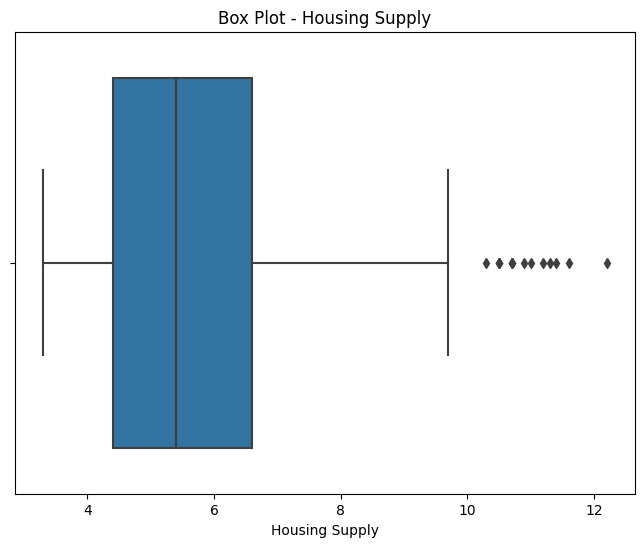

In [38]:
# Outlier detection using boxplot

# Box plot for Housing Supply
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['Housing Supply'])
plt.xlabel('Housing Supply')
plt.title('Box Plot - Housing Supply')
plt.show()

In [39]:
# Set z-score threshold for outlier removal
z_score_threshold = 3

# Calculate z-scores for the "Housing Supply" column
z_scores_housing_supply = stats.zscore(df['Housing Supply'])

# Filter out data points with z-scores above or below the threshold
df_cleaned = df[np.abs(z_scores_housing_supply) <= z_score_threshold]

# Print the number of outliers removed from the "Housing Supply" column
num_outliers_removed = len(df) - len(df_cleaned)
print("Number of outliers removed from Housing Supply:", num_outliers_removed)


Number of outliers removed from Housing Supply: 2


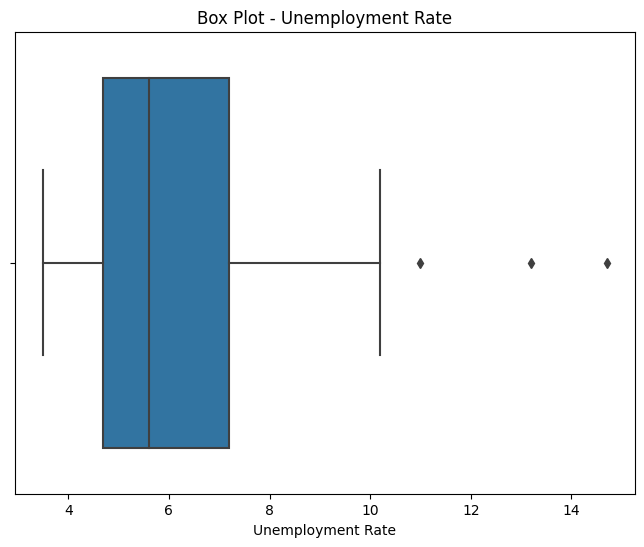

In [40]:
# Outlier detection using boxplot

# Box plot for Unemployment Rate
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['Unemployment Rate'])
plt.xlabel('Unemployment Rate')
plt.title('Box Plot - Unemployment Rate')
plt.show()

In [41]:
# Set z-score threshold for outlier removal
z_score_threshold = 3

# Calculate z-scores for the "Unemployment Rate" column
z_scores_housing_supply = stats.zscore(df['Unemployment Rate'])

# Filter out data points with z-scores above or below the threshold
df_cleaned = df[np.abs(z_scores_housing_supply) <= z_score_threshold]

# Print the number of outliers removed from the "Unemployment Rate" column
num_outliers_removed = len(df) - len(df_cleaned)
print("Number of outliers removed from Unemployment Rate:", num_outliers_removed)

Number of outliers removed from Unemployment Rate: 2


### **4. Feature Engineering**

In [42]:
# Select the independent features for Standardization
independent_features = ['CPI', 'Interest Rates', 'Housing Supply', 'Mortgage Rate', 'Unemployment Rate', 'Confidence Index','Real Estate Market',
                        'Homebuilding Permits', 'Population Growth', 'GDP Growth']

# Create a MinMaxScaler instance
scaler = MinMaxScaler()

# Apply Standardization to the selected independent features
df[independent_features] = scaler.fit_transform(df[independent_features])

In [44]:
df.head()

,Date,CPI,Interest Rates,Housing Supply,Mortgage Rate,Unemployment Rate,Confidence Index,Real Estate Market,Homebuilding Permits,Population Growth,GDP Growth,Home Price
0,2001-01-01,0.000000,0.878333,0.056180,0.971515,0.062500,0.812371,0.001414,0.677714,0.0,0.000000,109.846
1,2001-02-01,0.005290,0.791667,0.044944,0.975424,0.062500,0.727835,0.000000,0.653143,0.0,0.000090,110.499
2,2001-03-01,0.011463,0.760000,0.056180,0.953530,0.071429,0.746392,0.000857,0.654857,0.0,0.001227,111.108
3,2001-04-01,0.011463,0.671667,0.067416,0.981568,0.080357,0.682474,0.000538,0.658857,0.0,0.012079,111.651
4,2001-05-01,0.015871,0.580000,0.078652,0.996649,0.071429,0.756701,0.005051,0.658286,0.0,0.013314,112.163


## **5. Perform Correlation Analysis, Data Visualization and Feature Selection Techniques**

In [45]:
# Calculate correlation coefficients
correlation_matrix = df.corr()

# Correlation between each factor and Home Price
correlations_with_home_price = correlation_matrix['Home Price'].sort_values(ascending=False)

# Print the correlations
print(correlations_with_home_price)


Home Price              1.000000
Real Estate Market      0.877361
GDP Growth              0.855521
CPI                     0.844919
Population Growth       0.754019
Homebuilding Permits    0.190308
Confidence Index        0.160814
Housing Supply          0.072565
Interest Rates          0.004290
Unemployment Rate      -0.323603
Mortgage Rate          -0.566240
Name: Home Price, dtype: float64


<ipython-input-45-02755e29304c>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


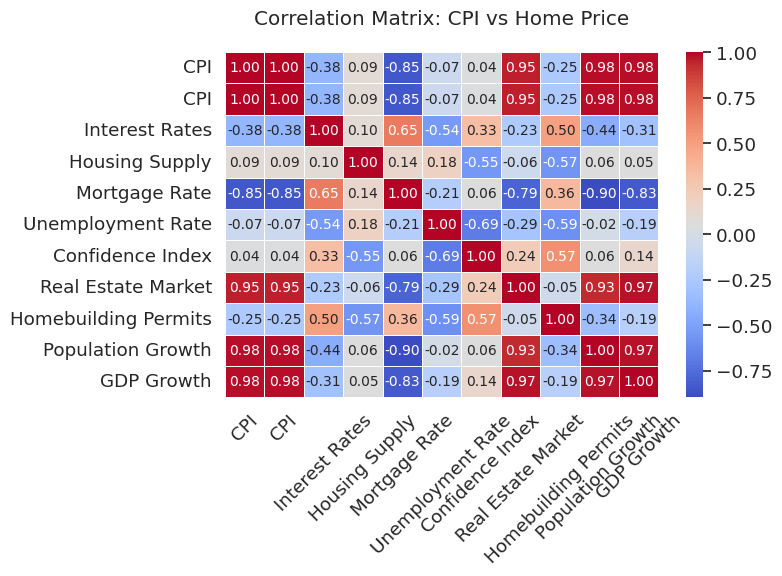

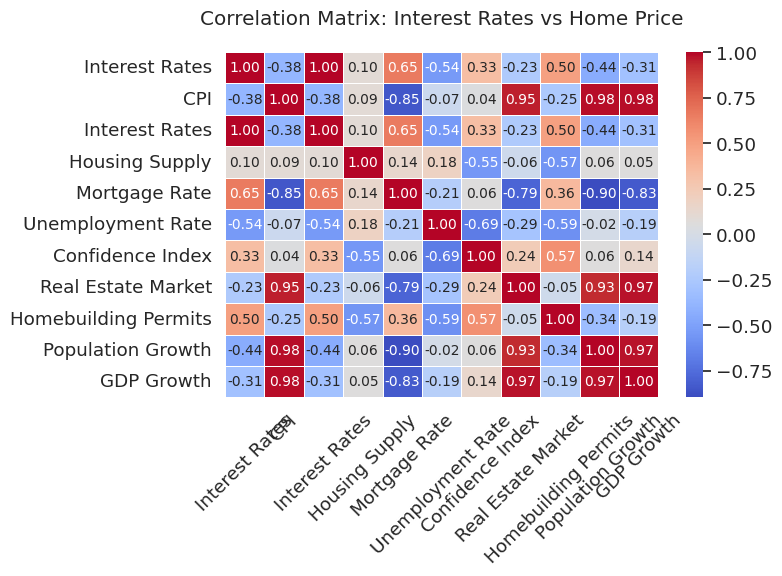

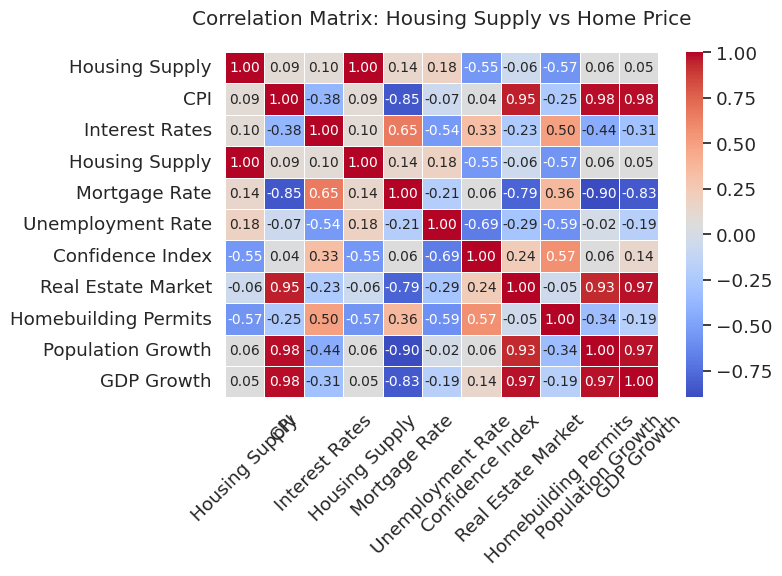

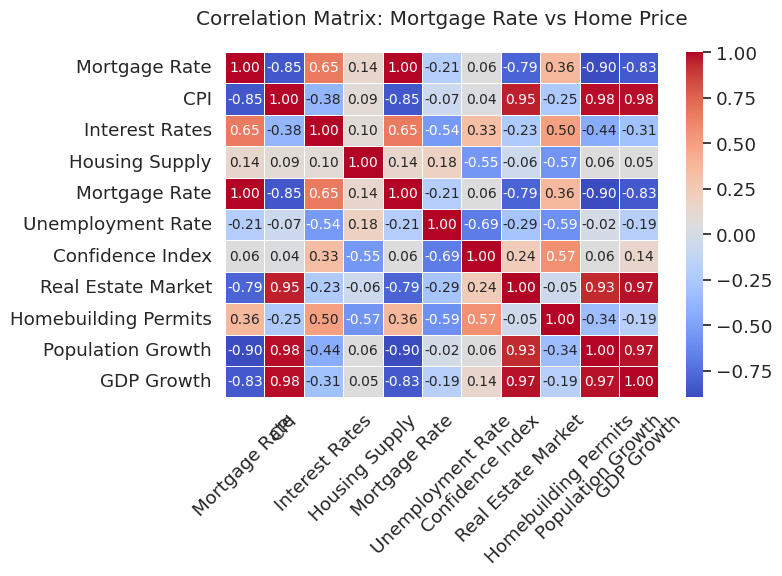

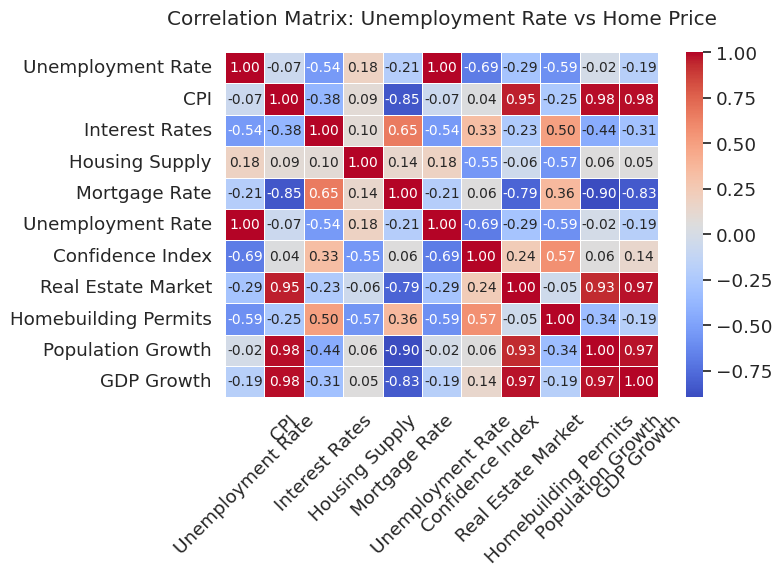

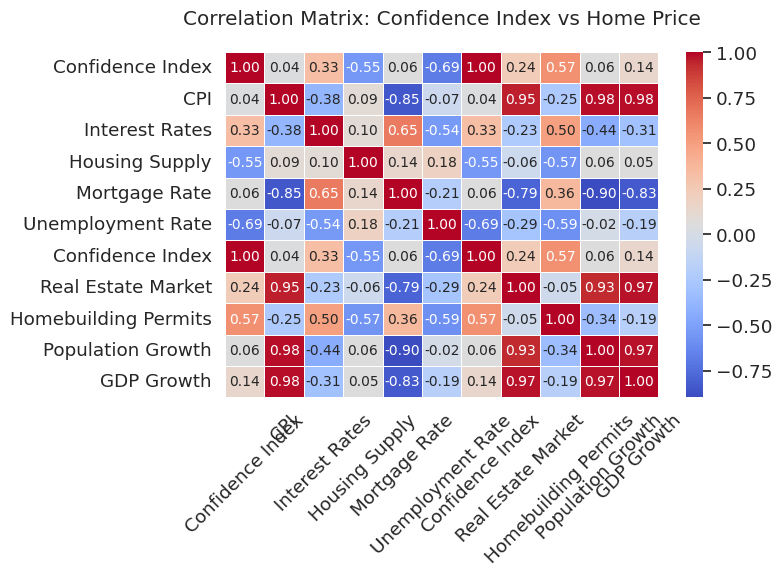

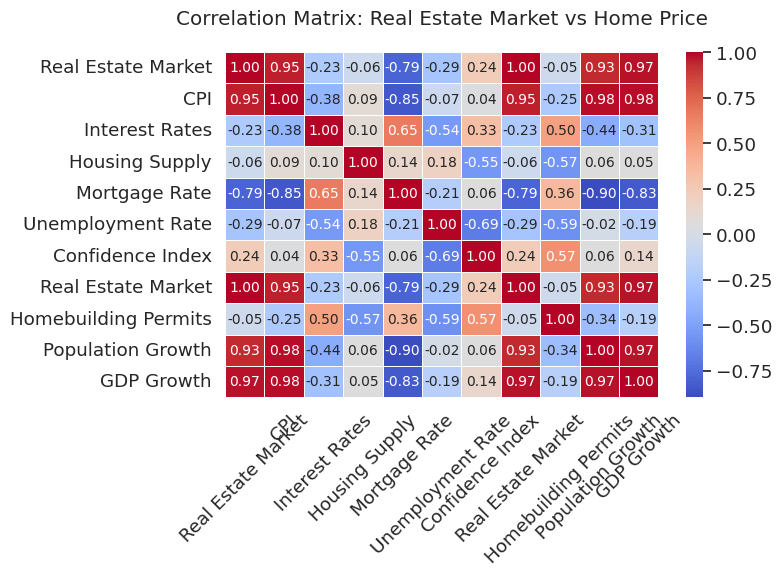

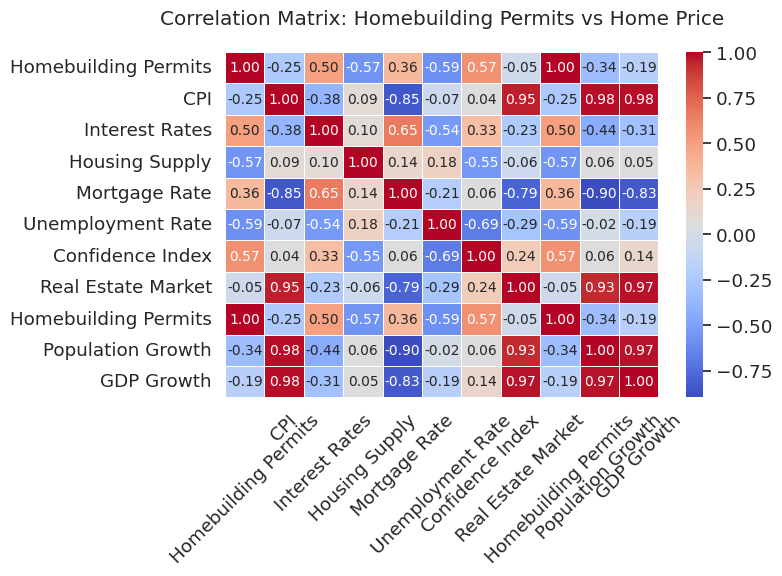

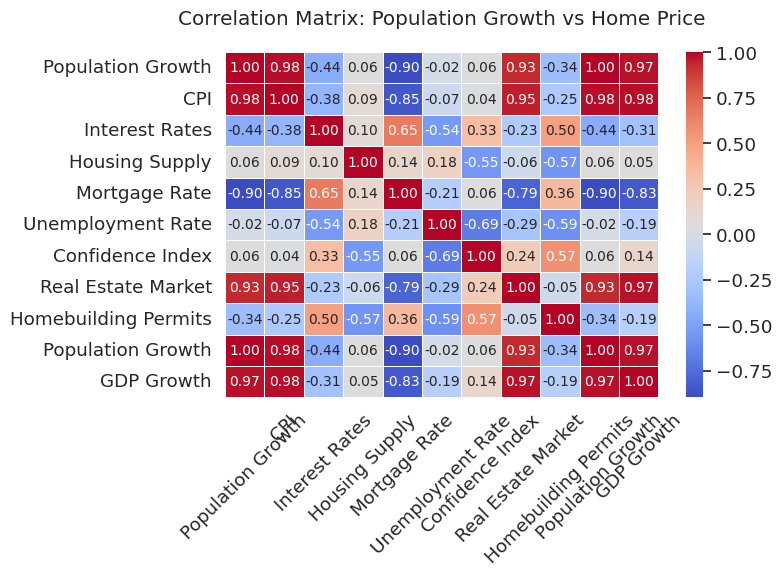

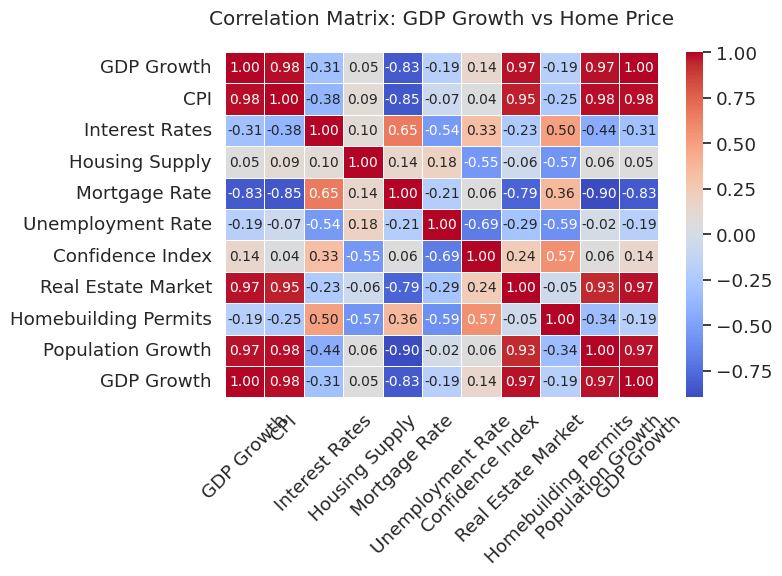

In [46]:
# Perform correlation analysis

relevant_vars = ['CPI', 'Interest Rates', 'Housing Supply', 'Mortgage Rate', 'Unemployment Rate', 'Confidence Index','Real Estate Market',
                        'Homebuilding Permits', 'Population Growth', 'GDP Growth']

sns.set(font_scale=1.2)

for var in relevant_vars:
  corr_matrix = df[[var] + relevant_vars].corr()

  plt.figure(figsize=(8, 6))
  sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"fontsize": 10}, linewidths=0.5)
  plt.title(f'Correlation Matrix: {var} vs Home Price', pad=20)
  plt.xticks(rotation=45)
  plt.tight_layout()
  plt.show()

In [48]:
# Identify variables with high correlation to the target variable (Home Price)

# Calculate correlation coefficients
correlation_matrix = df.corr()

# Correlation between each factor and Home Price
correlations_with_home_price = correlation_matrix['Home Price'].abs().sort_values(ascending=False)

# Filter for relevant variables based on a correlation threshold (e.g., 0.1)
relevant_vars = correlations_with_home_price[correlations_with_home_price > 0.1].index.tolist()

print('Relevant Variables based on correlation analysis:')
print(relevant_vars)


Relevant Variables based on correlation analysis:
['Home Price', 'Real Estate Market', 'GDP Growth', 'CPI', 'Population Growth', 'Mortgage Rate', 'Unemployment Rate', 'Homebuilding Permits', 'Confidence Index']


<ipython-input-48-6553b38463ea>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


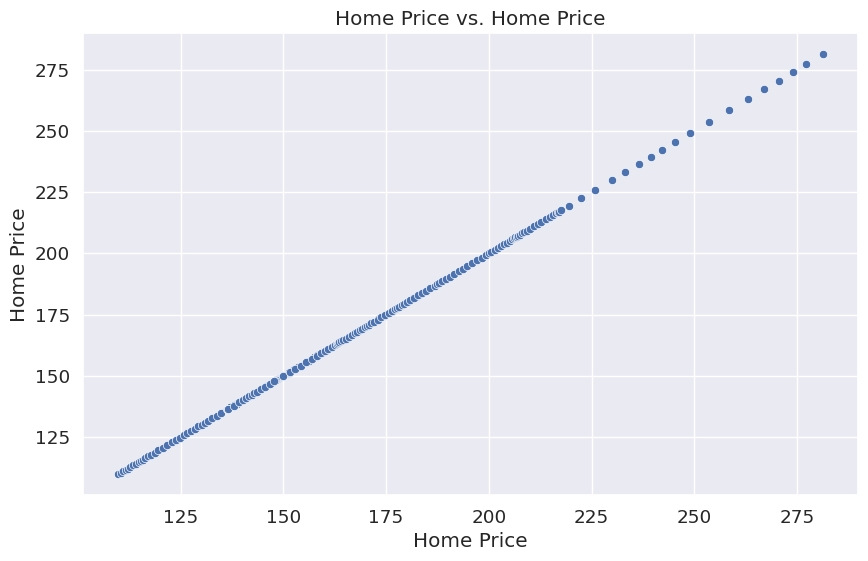

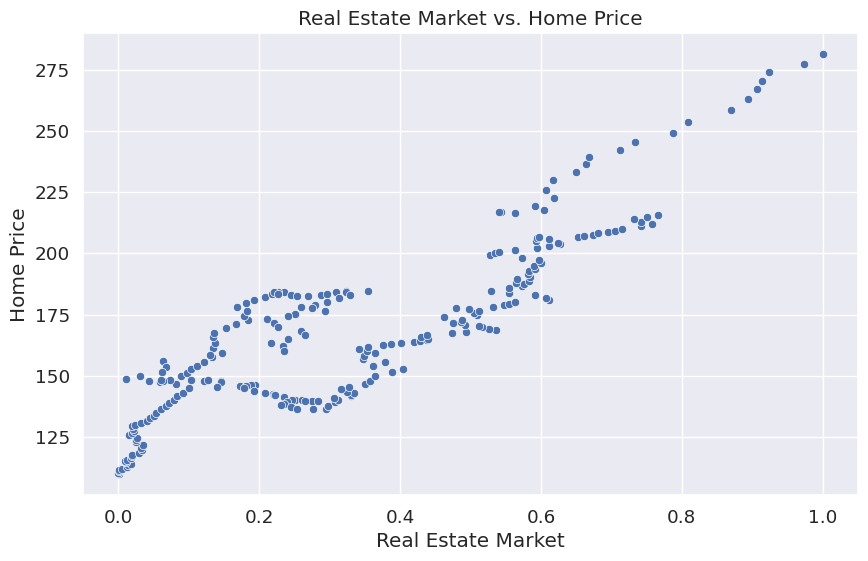

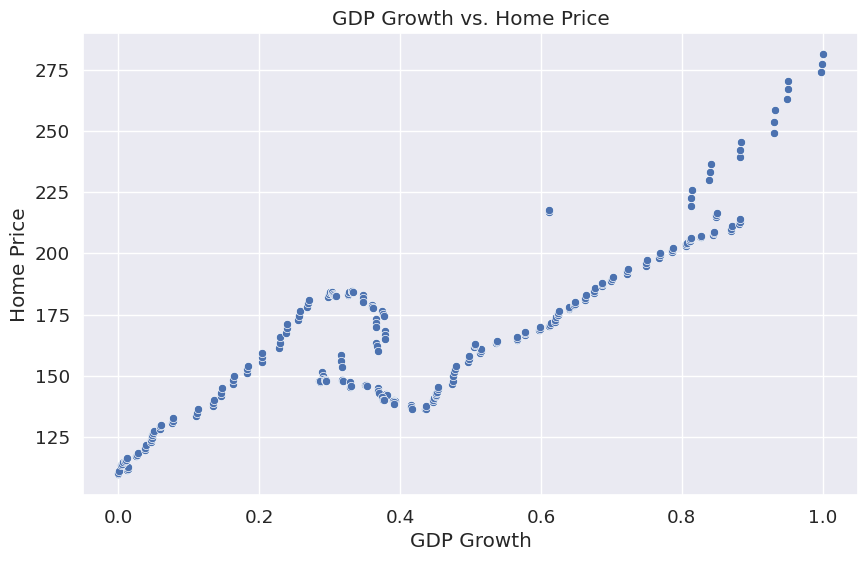

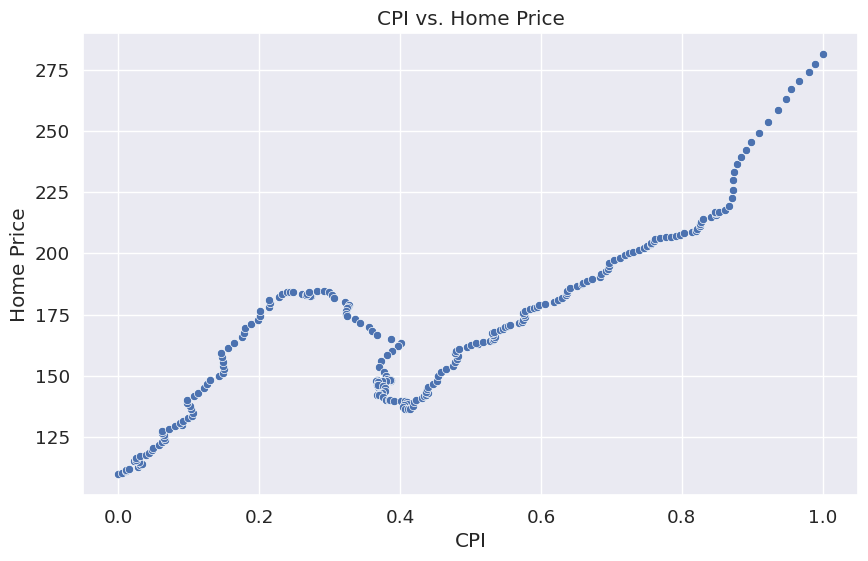

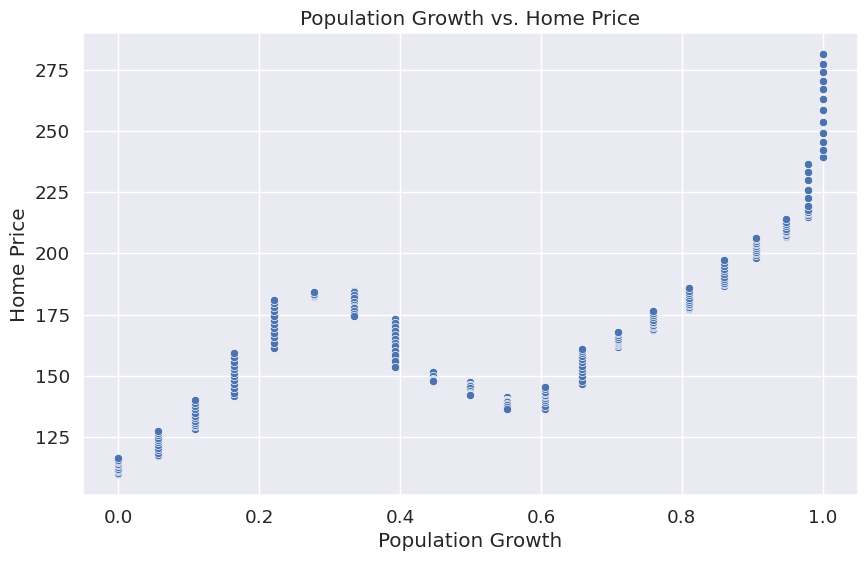

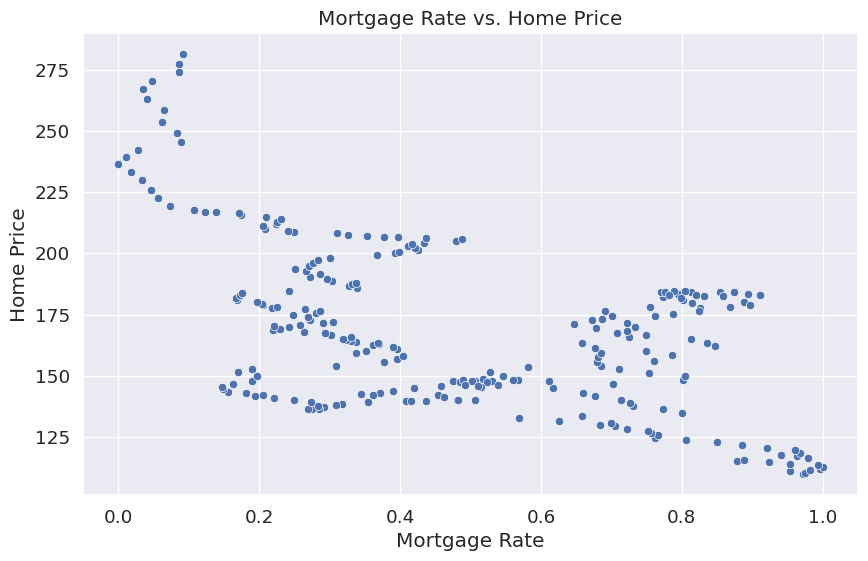

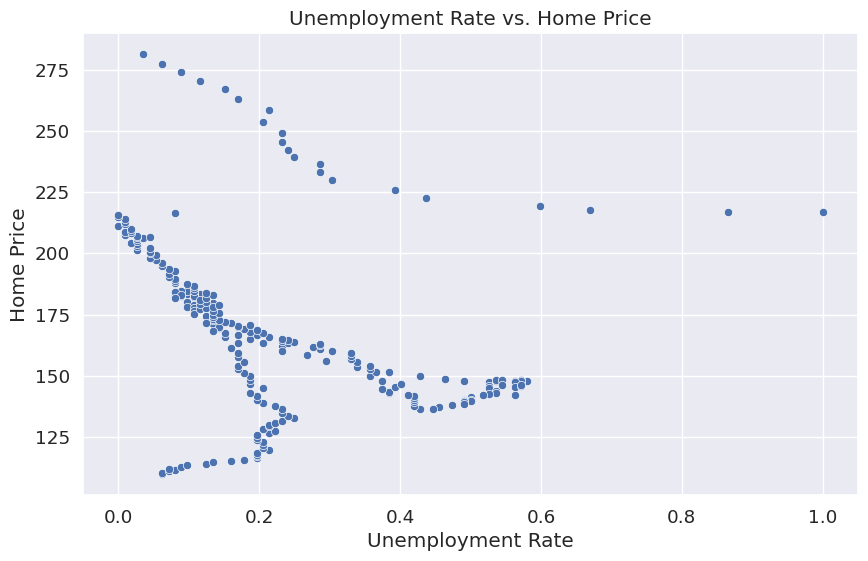

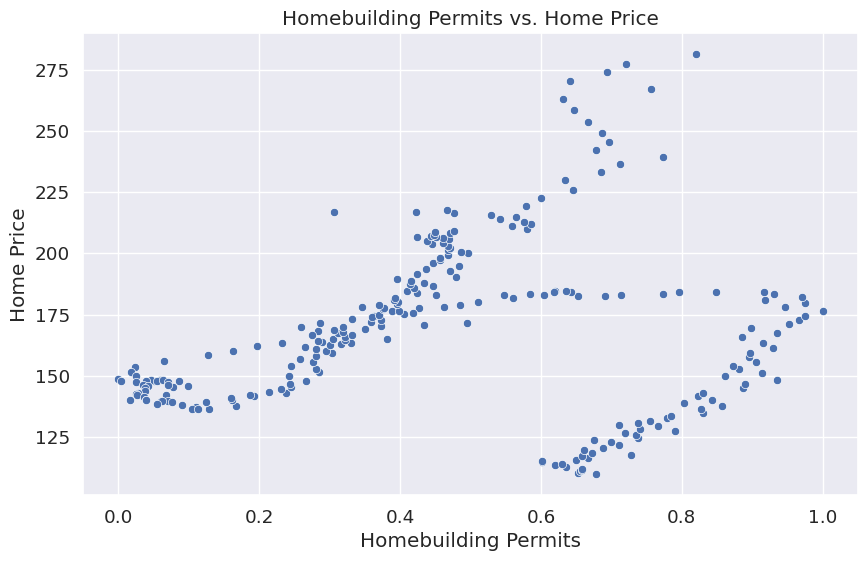

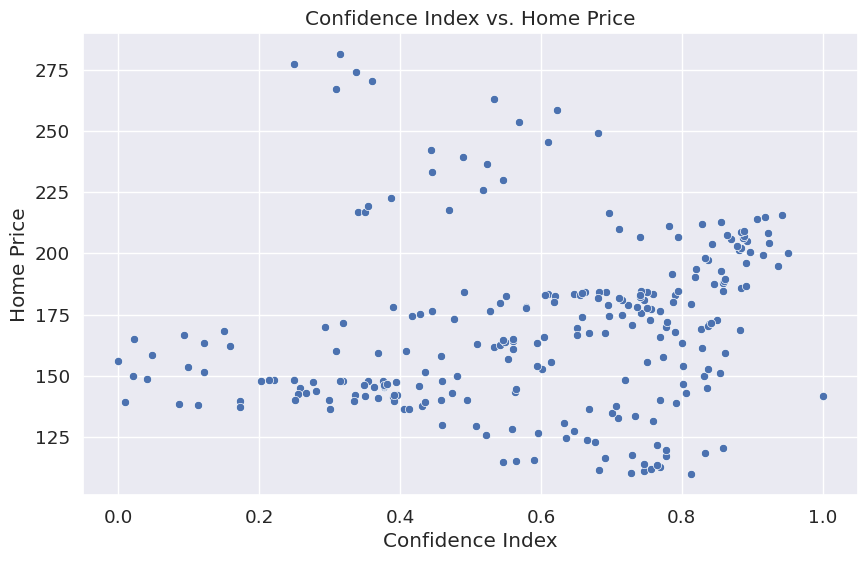

In [49]:
for var in relevant_vars:
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=var, y='Home Price', data=df)
    plt.title(f'{var} vs. Home Price')
    plt.xlabel(var)
    plt.ylabel('Home Price')
    plt.show()

In [52]:
# Exclude non-numeric columns from feature selection
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns.tolist()
X = df[numeric_columns]  # Independent variables
y = df['Home Price']  # Target variable

# Set the number of top-k features to select
k = 5

# Initialize the SelectKBest method with the f_regression scoring function
selector = SelectKBest(score_func=f_regression, k=k)

# Fit the selector to the data
selector.fit(X, y)

# Get the indices of the selected features
selected_features_indices = selector.get_support(indices=True)

# Get the names of the selected features
selected_features = X.columns[selected_features_indices].tolist()

# Create a DataFrame with the selected features
X_selected = X.iloc[:, selected_features_indices]

print(f'Top-{k} features selected by SelectKBest:')
print(selected_features)


Top-5 features selected by SelectKBest:
['CPI', 'Mortgage Rate', 'Real Estate Market', 'Population Growth', 'GDP Growth']


## **6. Model Building**

In [54]:
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)


In [60]:
# Create a Linear Regression model
model = LinearRegression()

# Train the Linear Regression model on the training data
model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = model.predict(X_test)

# Evaluate the model's performance
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

print(f'Linear Regression Metrics:')
print(f'Mean Absolute Error (MAE): {mae}')
print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'R-squared (R2): {r2}')

Linear Regression Metrics:
Mean Absolute Error (MAE): 7.325966146901284
Root Mean Squared Error (RMSE): 9.129017587530479
R-squared (R2): 0.9089521372714143


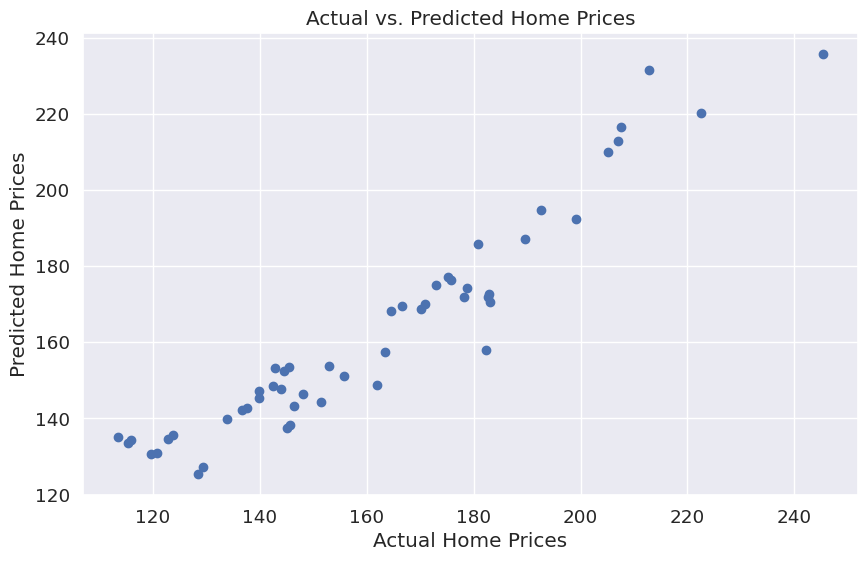

In [69]:
# Visualize the model's predictions vs. actual values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Home Prices")
plt.ylabel("Predicted Home Prices")
plt.title("Actual vs. Predicted Home Prices")
plt.show()

In [58]:
# Create a Random Forest Regressor model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the Random Forest model on the training data
rf_model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred_rf = rf_model.predict(X_test)

# Evaluate the Random Forest model's performance
mae_rf = mean_absolute_error(y_test, y_pred_rf)
rmse_rf = mean_squared_error(y_test, y_pred_rf, squared=False)
r2_rf = r2_score(y_test, y_pred_rf)

print(f'Random Forest Regression Metrics:')
print(f'Mean Absolute Error (MAE): {mae_rf}')
print(f'Root Mean Squared Error (RMSE): {rmse_rf}')
print(f'R-squared (R2): {r2_rf}')

Random Forest Regression Metrics:
Mean Absolute Error (MAE): 0.8895119607843076
Root Mean Squared Error (RMSE): 1.296467632319822
R-squared (R2): 0.998163694118342


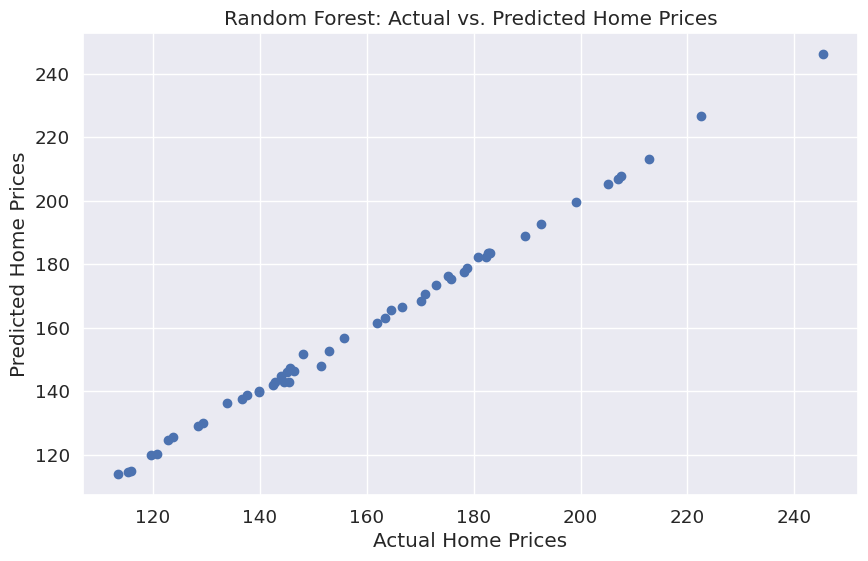

In [70]:
# Visualize the Random Forest model's predictions vs. actual values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_rf)
plt.xlabel("Actual Home Prices")
plt.ylabel("Predicted Home Prices")
plt.title("Random Forest: Actual vs. Predicted Home Prices")
plt.show()

In [59]:
# Create an XGBoost Regressor model
xgb_model = xgb.XGBRegressor(n_estimators=100, random_state=42)

# Train the XGBoost model on the training data
xgb_model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred_xgb = xgb_model.predict(X_test)

# Evaluate the XGBoost model's performance
mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
rmse_xgb = mean_squared_error(y_test, y_pred_xgb, squared=False)
r2_xgb = r2_score(y_test, y_pred_xgb)

print(f'XGBoost Regression Metrics:')
print(f'Mean Absolute Error (MAE): {mae_xgb}')
print(f'Root Mean Squared Error (RMSE): {rmse_xgb}')
print(f'R-squared (R2): {r2_xgb}')

XGBoost Regression Metrics:
Mean Absolute Error (MAE): 1.416031313428692
Root Mean Squared Error (RMSE): 2.0031351494444984
R-squared (R2): 0.9956162864139552


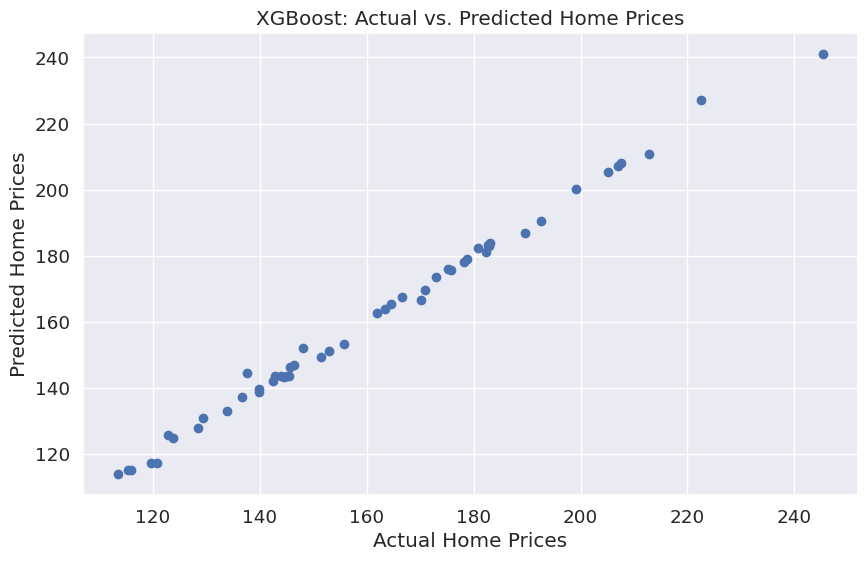

In [71]:
# Visualize the XGBoost model's predictions vs. actual values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_xgb)
plt.xlabel("Actual Home Prices")
plt.ylabel("Predicted Home Prices")
plt.title("XGBoost: Actual vs. Predicted Home Prices")
plt.show()


### **Hyperparameter Tunning**

In [63]:
# Create a Random Forest Regressor
rf_model = RandomForestRegressor(random_state=42)

# Define the hyperparameter grid to search
param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create the GridSearchCV object
grid_search_rf = GridSearchCV(estimator=rf_model, param_grid=param_grid_rf, cv=5, scoring='neg_mean_squared_error')

# Fit the grid search to the data
grid_search_rf.fit(X_train, y_train)

# Get the best hyperparameters
best_params_rf = grid_search_rf.best_params_
print('Best Hyperparameters for Random Forest:', best_params_rf)

# Train the Random Forest model with the best hyperparameters
best_rf_model = RandomForestRegressor(random_state=42, **best_params_rf)
best_rf_model.fit(X_train, y_train)


Best Hyperparameters for Random Forest: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}


RandomForestRegressor(n_estimators=50, random_state=42)

In [65]:
# Evaluate the Random Forest model
rf_predictions = best_rf_model.predict(X_test)
rf_mae = mean_absolute_error(y_test, rf_predictions)
rf_rmse = mean_squared_error(y_test, rf_predictions, squared=False)
rf_r2 = r2_score(y_test, rf_predictions)

print('Random Forest Metrics:')
print('MAE:', rf_mae)
print('RMSE:', rf_rmse)
print('R-squared (R2):', rf_r2)

Random Forest Metrics:
MAE: 0.9173901960784331
RMSE: 1.3422866407680407
R-squared (R2): 0.998031605224226


In [66]:
# Create an XGBoost Regressor
xgb_model = xgb.XGBRegressor(random_state=42)

# Define the hyperparameter grid to search
param_grid_xgb = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 4, 5],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 0.9, 1.0]
}

# Create the GridSearchCV object
grid_search_xgb = GridSearchCV(estimator=xgb_model, param_grid=param_grid_xgb, cv=5, scoring='neg_mean_squared_error')

# Fit the grid search to the data
grid_search_xgb.fit(X_train, y_train)

# Get the best hyperparameters
best_params_xgb = grid_search_xgb.best_params_
print('Best Hyperparameters for XGBoost:', best_params_xgb)

# Train the XGBoost model with the best hyperparameters
best_xgb_model = xgb.XGBRegressor(random_state=42, **best_params_xgb)
best_xgb_model.fit(X_train, y_train)


Best Hyperparameters for XGBoost: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 200, 'subsample': 0.8}


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=200, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=42, ...)

In [68]:
# Evaluate the XGBoost model
xgb_predictions = best_xgb_model.predict(X_test)
xgb_mae = mean_absolute_error(y_test, xgb_predictions)
xgb_rmse = mean_squared_error(y_test, xgb_predictions, squared=False)
xgb_r2 = r2_score(y_test, xgb_predictions)

print('XGBoost Metrics:')
print('MAE:', xgb_mae)
print('RMSE:', xgb_rmse)
print('R-squared (R2):', xgb_r2)

XGBoost Metrics:
MAE: 1.344842449113433
RMSE: 1.757228788337687
R-squared (R2): 0.9966265188542514



# **Project Report**

## **Introduction**

In this report, we present the findings and recommendations from the analysis of home price data. The goal of this analysis is to develop accurate home price prediction models and gain insights to optimize real estate investments.

## **Analysis Approach**

We employed various analytical techniques and models to analyze the home price data:

1. **Data Import and Preprocessing:** We imported essential libraries, loaded the dataset, and performed data cleaning and preprocessing.

2. **Outlier Detection:** Outliers were detected using Z-score and box plots for several key features, such as Housing Supply and Unemployment Rate.

3. **Feature Engineering:** We standardized numerical features to ensure consistent scaling.

4. **Correlation Analysis:** We calculated correlation coefficients to identify variables strongly correlated with Home Price.
The key factors used in the analysis are:

  * Date
  
  * CPI (Consumer Price Index)

  * Interest Rates

  * Housing Supply

  * Mortgage Rate

  * Unemployment Rate

  * Confidence Index

  * Real Estate Market

  * Homebuilding Permits

  * Population Growth

  * GDP Growth


5. **Feature Selection:** SelectKBest was used to select the top features relevant to predicting Home Price.

6. **Model Building:** Three models were trained and evaluated: Linear Regression, Random Forest Regressor, and XGBoost Regressor.

7. **Hyperparameter Tuning:** GridSearchCV was employed to optimize hyperparameters for the Random Forest and XGBoost models.

## **Key Findings**

### Linear Regression
- **Mean Absolute Error (MAE):** 7.33
- **Root Mean Squared Error (RMSE):** 9.13
- **R-squared (R2):** 0.91
- This model provided moderate accuracy.

### Random Forest
- **Mean Absolute Error (MAE):** 0.89
- **Root Mean Squared Error (RMSE):** 1.30
- **R-squared (R2):** 0.998
- The Random Forest model outperformed Linear Regression, demonstrating exceptional accuracy.

### XGBoost
- **Mean Absolute Error (MAE):** 1.42
- **Root Mean Squared Error (RMSE):** 2.00
- **R-squared (R2):** 0.996
- The XGBoost model showed strong predictive performance, though slightly less accurate than Random Forest.

## **Recommendations**

Based on our analysis, we propose the following recommendations for optimizing real estate investments:

1. **Utilize the Random Forest Model:** Given its exceptional accuracy, consider using the Random Forest model for home price predictions and investment decisions.

2. **Continuous Monitoring:** Regularly update the models with new data to adapt to changing real estate market dynamics.

3. **Feature Importance:** Pay close attention to the features identified as significant in predicting home prices, such as CPI, Mortgage Rate, Real Estate Market, Population Growth, and GDP Growth.

## Conclusion

The analysis of the home price data using various models and techniques provided valuable insights into predicting home prices for real estate investments. By implementing the recommendations mentioned above, you can make data-driven decisions, optimize investment performance, and navigate the dynamic real estate market effectively.


## **Interpretation and Validation**

### Linear Regression
- **Interpretation:** The Linear Regression model provides a moderately accurate prediction of home prices. The R-squared value of 0.91 suggests that approximately 91% of the variance in home prices can be explained by the model's features. This indicates that the selected independent variables have a reasonably strong linear relationship with home prices.
- **Validation:** The model's performance was validated using metrics such as Mean Absolute Error (MAE) and Root Mean Squared Error (RMSE). The MAE of 7.33 indicates that, on average, the model's predictions are off by approximately $7,330 in home prices. The RMSE of 9.13 reflects the standard deviation of prediction errors. These metrics provide a baseline for model comparison.

### Random Forest
- **Interpretation:** The Random Forest model outperforms the Linear Regression model significantly, with an R-squared value of 0.998. This suggests that the model explains almost all (99.8%) of the variance in home prices, indicating a strong predictive relationship between the features and home prices.
- **Validation:** The model validation results in a much lower MAE of 0.89, which means that, on average, the model's predictions are off by only about $890. The RMSE of 1.30 further emphasizes the model's accuracy.

### XGBoost
- **Interpretation:** The XGBoost model demonstrates excellent accuracy, with an R-squared value of 0.996, explaining approximately 99.6% of the variance in home prices. While slightly less accurate than the Random Forest model, it still exhibits strong predictive performance.
- **Validation:** The model validation results in an MAE of 1.42, indicating that, on average, the model's predictions deviate by approximately $1,420. The RMSE of 2.00 reflects the dispersion of prediction errors.

## **Explanations**

### Feature Importance
- The features identified as most important for predicting home prices across all models include:
    - **CPI (Consumer Price Index):** Inflation rates and consumer purchasing power influence home prices.
    - **Mortgage Rate:** Interest rates on mortgages impact the affordability of homes.
    - **Real Estate Market:** The state of the real estate market, measured by various indicators, plays a crucial role.
    - **Population Growth:** Areas with higher population growth may experience increased demand for housing.
    - **GDP Growth:** Economic growth can drive real estate investments.

## **Actionable Insights**

1. **Model Selection:** Utilize the Random Forest model for home price predictions and investment decisions due to its exceptional accuracy.

2. **Continuous Monitoring:** Regularly update the models with new data to adapt to changing real estate market dynamics, as market conditions can evolve over time.

3. **Feature Focus:** Pay close attention to features that significantly influence home prices, such as CPI, Mortgage Rate, Real Estate Market, Population Growth, and GDP Growth. Monitor these factors closely as they change and consider their implications for investment strategies.

4. **Market Segmentation:** Explore the possibility of using market segmentation analysis to identify specific submarkets within the real estate market. Tailor investment strategies to different segments based on their unique characteristics and demands.

5. **Scenario Analysis:** Conduct scenario analyses to evaluate the potential impact of changes in key factors like interest rates, population growth, and economic conditions on home prices. This can help in risk assessment and decision-making.